**IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**LOADING THE DATASET**

In [ ]:
df = pd.read_csv('MSFT.csv')

**HANDLING THE MISSING VALUES USING SIMPLE IMPUTER IN SKLEARN**

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = df.fillna(df.mean())  # Fill missing values with mean values

<ipython-input-4-5be8887a7716>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())  # Fill missing values with mean values


**ENCODING THE CATEGORICAL VALUES IS NOT REQUIRED BECAUSE THERE IS NO CATEGORICAL DATA IN THE DATASET**

**SPLITING THE DATA INTO TRAIN SET AND TEST SET**

In [ ]:
# Select relevant columns
df= df[['Date', 'Close', 'Volume']]

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Create lag features (optional, for time series data)
df['Close_Lag1'] = df['Close'].shift(1)
df.dropna(inplace=True)
X = df[['Close_Lag1', 'Volume']]  # Features
y = df['Close']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-5-3748f3c8fef9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-5-3748f3c8fef9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_Lag1'] = df['Close'].shift(1)
<ipython-input-5-3748f3c8fef9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.

**FEATURE SCALING USING MINMAXSCALER**

In [ ]:
# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

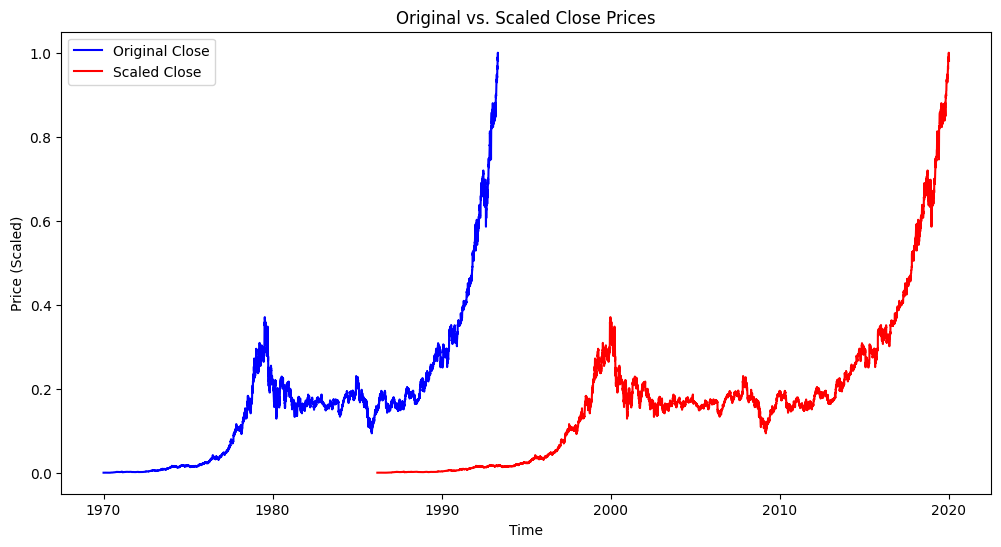

In [ ]:
import matplotlib.pyplot as plt
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
original_close = df['Close'].values.reshape(-1, 1)
scaled_close = df['Close']

plt.figure(figsize=(12, 6))
plt.plot(original_close, label='Original Close', color='blue')
plt.plot(scaled_close, label='Scaled Close', color='red')
plt.title('Original vs. Scaled Close Prices')
plt.xlabel('Time')
plt.ylabel('Price (Scaled)')
plt.legend()
plt.show()

**FEATURE ENGINEERING**

In [ ]:
# Feature engineering: Calculate a rolling mean of 'Close' prices
window_size = 5  # Adjust this based on your dataset and needs
df['Close_Rolling_Mean'] = df['Close'].rolling(window=window_size).mean()
df.dropna(inplace=True)
X = df[['Close_Lag1', 'Volume', 'Close_Rolling_Mean']]  # Updated Features
y = df['Close']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

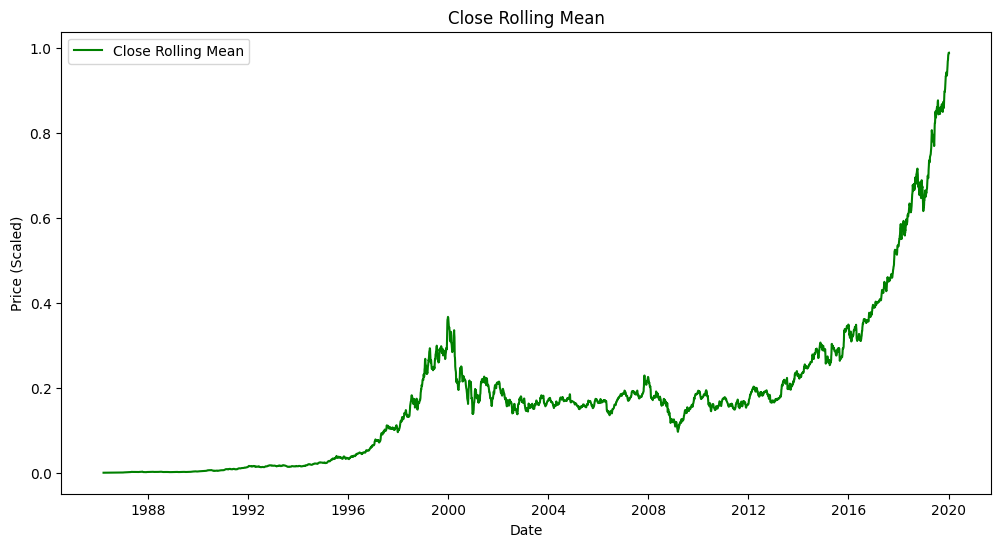

In [ ]:
# Plot the Rolling Mean feature
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close_Rolling_Mean'], label='Close Rolling Mean', color='green')
plt.title('Close Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price (Scaled)')
plt.legend()
plt.show()

**MODEL TRAINING**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error (MAE): 0.00203285512897076
R-squared (R2) Score: 0.999567141494731


In [ ]:
# Define a price change threshold for determining accuracy
threshold = 0.01  # Adjust this threshold as needed

# Calculate whether predictions are within the threshold
correct_predictions = abs(y_test - y_pred) <= threshold

# Calculate accuracy
accuracy = sum(correct_predictions) / len(correct_predictions)
print(f'Accuracy: {accuracy:.2%}')


Accuracy: 97.30%


In [ ]:
# Example prediction for a new data point
new_data_point = pd.DataFrame({'Close_Lag1': [300], 'Volume': [50000000],'Close_Rolling_Mean':[500]})
predicted_price = model.predict(new_data_point)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 215.22711000177662
